-----------------------------------------------------------------------------
# Pipeline for a simple binary classification on twitter dataset
----------------------
1. Loading Dataset
2. Dataset Cleaning
### 3. Data Vectorization:
### 4. Train a Model
### 5. Evaluation
### 6. Checking overfiting and underfiting's using Cross-validations and bias-varians tradeoff



### Loading dataset and CleandDataset method from previous section

In [30]:
#clean dataset mudole
from CleanDataset import preprocessing

#pandas library for working with dataframes 
import pandas as pd

#loading dataset
train = pd.read_csv("train_df.csv")
test = pd.read_csv("test_df.csv")
# shape of dataset
print("Size of train-set is : {}".format(train.shape[0]))
print("Size of test-set is : {}".format(test.shape[0]))

#show a few lines of dataframe
train.head()

Size of train-set is : 700
Size of test-set is : 300


,labels,tweets
0,pos,Now all @Apple has to do is get swype on the i...
1,pos,@Apple will be adding more carrier support to ...
2,pos,Hilarious @youtube video - guy does a duet wit...
3,pos,@RIM you made it too easy for me to switch to ...
4,pos,I just realized that the reason I got into twi...


### preprocess data and clean train and testsets

In [31]:
#get train and test labels
X_train, X_test = train['tweets'].tolist(), test['tweets'].tolist()
y_train, y_test = train['labels'].tolist(), test['labels'].tolist()

#cleaning train set
X_train = [preprocessing(x) for x in X_train ]

#cleaning test set
X_test = [preprocessing(x) for x in X_test ]

# 3. Data Vectorization

to train a machine learning model we need to convert our dataset into vectors a few exampls of feature extractors are in bellow

* TFIDF
* Bag of Words
* Word2Vec
* Glove
* Bert
* Albert
* ElmoNet
* fasttext
* and ..

** BOW ** Bag of Words

* A simplest text vectorization techniques

* Consider these two sentences:
![](images/bow1.jpeg)

* The intuition behind BOW is that two sentences are said to be similar if they contain similar set of words.

![](images/bow-2.jpeg)

* This will create a matrix of **dxn** where **d** is the total number of unique tokens in the corpus and **n** equals to the number of documents. In the above example, matrix will be of shape **11x2**.

# DO NOT TRAIN ON TEST SET! YOUR TRANSFORMER SHOULD FIT ON TRIN SET ONLY!

In [32]:
#importing a vectorizer for BOW
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

#learning a vectorizer from train using fit and using transform 
#we will transform any text into vectors using learned vectorizer
X_train_data = vectorizer.fit_transform(X_train)
X_test_data = vectorizer.transform(X_test)

# 4. Train a Model


In [48]:
#call scikit-learn library for naive bayse model
from sklearn.naive_bayes import MultinomialNB

#define an instance
classifier = MultinomialNB()

#train a model on train data
classifier.fit(X_train_data, y_train)

#make a prediction on test set
predict = classifier.predict(X_test_data)

# 5. Evaluation

In [49]:
print("Predict 10 samples:", predict[:10])
print("truth of 10 samples:", y_test[:10])

Predict 10 samples: ['neg' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos' 'pos']
truth of 10 samples: ['pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos']


In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#accuracy of the model
print("Accuracy:", accuracy_score(predict, y_test))

#evaluation report
print(classification_report(predict, y_test))

Accuracy: 0.7133333333333334
              precision    recall  f1-score   support

         neg       0.75      0.70      0.72       160
         pos       0.68      0.73      0.70       140

   micro avg       0.71      0.71      0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.72      0.71      0.71       300



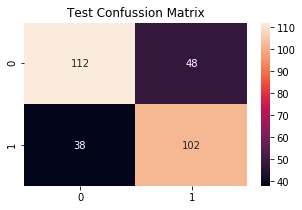

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

cmtx = confusion_matrix(predict, y_test)
plt.figure(figsize=(5,3))
sns.heatmap(cmtx, annot=True, fmt='d')
plt.title("Test Confussion Matrix")

plt.show()

# 6. Checking overfiting and underfiting's using Cross-validations and bias-varians tradeoff

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
estimator = MultinomialNB()

scores = cross_val_score(estimator, X_train_data, y_train, cv=5)

print("Mean 5-Fold CrossValidation:{} (+/- {})".format(scores.mean(), scores.std()))

Mean 5-Fold CrossValidation:0.7699999999999999 (+/- 0.04526565576501389)


# Conclussion:

* if you don't have test set befor any work split your dataset into train-test sets for training and evauation of your models
* always check your model overfitings
* More works needs to be done, the last but not least, try to using different data vectorizer like `TF-IDF` or `Word Embeddings` to see the differences in results, or pay more attention ot preprocessings and so on.
